In [1]:
# import PublicDataReader as pdr
# print(pdr.__version__)

# # 2. 공공 데이터 포털 Open API 서비스 인증키 입력하기
# serviceKey = "po%2BvjDs%2FHPpj2k7XRSj5JS4rN1QS3cNbauVItFsr92W3Y5SINeUQekkwj2oVEPxd%2B5lDhNURO%2BEXZPUHVs95bg%3D%3D"

https://greendreamtrre.tistory.com/268

* 기본 url 존재: 상세 page에서 확인
* 해당 기본 url에 '필수 요청사항'들을 더하여 request url 완성
* 필수 요청사항 및 상세사항은 상세 문서 확인 필요

In [2]:
import requests, bs4
import pandas as pd
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

In [14]:
def get_data(api_key_p, rgn_cd_p, date_p) :
    queryParams = '?' + urlencode(    # get 방식으로 쿼리를 분리하기 위해 '?'를 넣은 것이다. 메타코드 아님.
        {
            quote_plus('ServiceKey') : api_key_p,    # 필수 항목 1 : 서비스키 (본인의 서비스키)
            quote_plus('LAWD_CD') : rgn_cd_p,          # 필수 항목 2 : 지역코드 (법정코드목록조회에서 확인)
            quote_plus('DEAL_YMD') : date_p,        # 픽수 항목 3 : 계약월
            quote_plus('numOfRows') : '9999'
         }
    )

    response = requests.get(xmlUrl + queryParams).text.encode('utf-8')
    
    return response

def get_items(reponse) : 
    xmlobj = bs4.BeautifulSoup(response, 'lxml-xml')
    rows = xmlobj.findAll('item')

    rowList = []
    nameList = []
    columnList = {}
    rowsLen = len(rows)
    
    for i in range(rowsLen):
        columns = rows[i].find_all()

        columnsLen = len(columns)
        for j in range(0, columnsLen):

            #### 1. Column Name 만들기
            columnList[columns[j].name] =  columns[j].text

            #### 2. Column 별 data 수집하기 (Row 데이터 생성)
            #eachColumn = columns[j].text # column 내 순서대로 값들 추출
            #columnList.append(eachColumn) # 추출한 값들을 list 형태로 저장, 다 저장되면 1개 row의 모든 값들 저장 완성

        #### 3. Row 데이터 누적
        rowList.append(columnList) # 위에서 완성된 row data를 rowList에 저장하여 1개씩 row 누적 완성

        columnList = {}

    result = pd.DataFrame(rowList)
    int_col = ['거래금액', '건축년도', '년', '전용면적', '월', '일', '층']
    
    for i in int_col :
        result[i] = pd.to_numeric(result[i].str.replace(',',''))
    
    return result

## 1. API를 통해 데이터 다운로드하는 법

In [3]:
xmlUrl = 'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev'
api_key = unquote('po%2BvjDs%2FHPpj2k7XRSj5JS4rN1QS3cNbauVItFsr92W3Y5SINeUQekkwj2oVEPxd%2B5lDhNURO%2BEXZPUHVs95bg%3D%3D')

In [5]:
############# 필수 항목은 공공데이터 상세설명 -> 상세기능 -> 요청변수 중 '필수' 항목

queryParams = '?' + urlencode(    # get 방식으로 쿼리를 분리하기 위해 '?'를 넣은 것이다. 메타코드 아님.
    {
        quote_plus('ServiceKey') : api_key,    # 필수 항목 1 : 서비스키 (본인의 서비스키)
        quote_plus('LAWD_CD') : '11110',          # 필수 항목 2 : 지역코드 (법정코드목록조회에서 확인)
        quote_plus('DEAL_YMD') : '201512'         # 픽수 항목 3 : 계약월
     }
)

In [ ]:
# ## Decode 후 과정
# api_key_decode = requests.utils.unquote(My_API_Key)
# parameters = {'ServiceKey' : api_key_decode, 'LAWD_CD' :'11110', 'DEAL_YMD':'201512'}
# req = requests.get(xmlUrl, params = parameters)
# req.text

In [6]:
response = requests.get(xmlUrl + queryParams).text.encode('utf-8')
xmlobj = bs4.BeautifulSoup(response, 'lxml-xml')
# xmlobj    # 디버깅용.

In [7]:
rows = xmlobj.findAll('item') # 전체 item 데이터 보유
columns = rows[0].find_all() # 1개 item의 데이터
columns[0].name, columns[0].text # 첫번째 item의 name, text 추출

('거래금액', '    82,500')

In [8]:
rows[:3]

[<item><거래금액>    82,500</거래금액><건축년도>2008</건축년도><년>2015</년><도로명>사직로8길</도로명><도로명건물본번호코드>00004</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>03</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100135</도로명코드><법정동> 사직동</법정동><법정동본번코드>0009</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드>11500</법정동읍면동코드><법정동지번코드>1</법정동지번코드><아파트>광화문풍림스페이스본(101동~105동)</아파트><월>12</월><일>10</일><일련번호>11110-2203</일련번호><전용면적>94.51</전용면적><지번>9</지번><지역코드>11110</지역코드><층>11</층></item>,
 <item><거래금액>    60,000</거래금액><건축년도>1981</건축년도><년>2015</년><도로명>세종대로23길</도로명><도로명건물본번호코드>00047</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>02</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100190</도로명코드><법정동> 당주동</법정동><법정동본번코드>0145</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드>11700</법정동읍면동코드><법정동지번코드>1</법정동지번코드><아파트>롯데미도파광화문빌딩</아파트><월>12</월><일>22</일><일련번호>11110-12</일련번호><전용면적>149.95</전용면적><지번>145</지번><지역코드>11110</지역코드><층>8</층></item>,
 <item>

In [9]:
columns

[<거래금액>    82,500</거래금액>,
 <건축년도>2008</건축년도>,
 <년>2015</년>,
 <도로명>사직로8길</도로명>,
 <도로명건물본번호코드>00004</도로명건물본번호코드>,
 <도로명건물부번호코드>00000</도로명건물부번호코드>,
 <도로명시군구코드>11110</도로명시군구코드>,
 <도로명일련번호코드>03</도로명일련번호코드>,
 <도로명지상지하코드>0</도로명지상지하코드>,
 <도로명코드>4100135</도로명코드>,
 <법정동> 사직동</법정동>,
 <법정동본번코드>0009</법정동본번코드>,
 <법정동부번코드>0000</법정동부번코드>,
 <법정동시군구코드>11110</법정동시군구코드>,
 <법정동읍면동코드>11500</법정동읍면동코드>,
 <법정동지번코드>1</법정동지번코드>,
 <아파트>광화문풍림스페이스본(101동~105동)</아파트>,
 <월>12</월>,
 <일>10</일>,
 <일련번호>11110-2203</일련번호>,
 <전용면적>94.51</전용면적>,
 <지번>9</지번>,
 <지역코드>11110</지역코드>,
 <층>11</층>]

In [10]:
columns[0].name, columns[0].text

('거래금액', '    82,500')

In [11]:
rowList = []
nameList = []
columnList = []

rowsLen = len(rows)
for i in range(0, rowsLen):
    columns = rows[i].find_all()
    
    columnsLen = len(columns)
    for j in range(0, columnsLen):
        
        #### Column Name 만들기
        # 첫 번째 행 데이터 값 수집 시에만 컬럼 값을 저장한다. (데이터 형태는 동일하므로)
        if i == 0:
            nameList.append(columns[j].name)
            
        #### Column 별 data 수집하기 (Row 데이터 생성)
        eachColumn = columns[j].text # column 내 순서대로 값들 추출
        columnList.append(eachColumn) # 추출한 값들을 list 형태로 저장, 다 저장되면 1개 row의 모든 값들 저장 완성
    
    ### Row 데이터 누적
    rowList.append(columnList) # 위에서 완성된 row data를 rowList에 저장하여 1개씩 row 누적 완성
    
    columnList = []    # 다음 row의 값을 넣기 위해 비워준다. (매우 중요!!)
    
result = pd.DataFrame(rowList, columns=nameList) # 값 자체가 row로 누적되었고, nameList는 column 명임
result.head()

,거래금액,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드,...,법정동읍면동코드,법정동지번코드,아파트,월,일,일련번호,전용면적,지번,지역코드,층
0,"82,500",2008,2015,사직로8길,00004,00000,11110,03,0,4100135,...,11500,1,광화문풍림스페이스본(101동~105동),12,10,11110-2203,94.51,9,11110,11
1,"60,000",1981,2015,세종대로23길,00047,00000,11110,02,0,4100190,...,11700,1,롯데미도파광화문빌딩,12,22,11110-12,149.95,145,11110,8
2,"130,000",2004,2015,경희궁2길,00005,00005,11110,01,0,4100005,...,11800,1,킹스매너,12,8,11110-118,194.43,110-15,11110,6
3,"105,000",2004,2015,사직로8길,00024,00000,11110,05,0,4100135,...,11800,1,경희궁의아침2단지,12,14,11110-115,124.17,71,11110,8
4,"120,000",2003,2015,사직로8길,00020,00000,11110,05,0,4100135,...,11800,1,경희궁 파크팰리스,12,24,11110-107,146.33,95,11110,4


## 2. 원하는 지역구 매매 확인

* 법정도 코드는 오른쪽에서 다운 받으면 된다. https://www.code.go.kr/index.do

In [12]:
rgn_cd = pd.read_csv('region_code.txt', encoding='euc-kr', delimiter='\t')
rgn_nm = '강남구'
rgn_nb = rgn_cd.loc[rgn_cd['법정동명'].str.contains(rgn_nm),'법정동코드'].iloc[0, ]
rgn_cd_p = str(rgn_nb)[:5]

In [15]:
response = get_data(api_key, rgn_cd_p, '202012')
res_df = get_items(response)
res_df.shape

(193, 24)

In [21]:
res_df.head()

,거래금액,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드,...,법정동읍면동코드,법정동지번코드,아파트,월,일,일련번호,전용면적,지번,지역코드,층
0,78000,2004,2020,언주로86길,00025,00000,11680,01,0,4166619,...,10100,1,우정에쉐르3,12,1,11680-595,63.670,707-15,11680,4
1,198000,2009,2020,도곡로43길,00020,00000,11680,01,0,4166233,...,10100,1,래미안그레이튼,12,1,11680-3871,59.970,763-16,11680,8
2,250000,2005,2020,선릉로69길,00020,00000,11680,01,0,4166489,...,10100,1,e-편한세상,12,2,11680-3622,84.991,755-4,11680,11
3,252000,2006,2020,역삼로,00306,00000,11680,01,0,3122008,...,10100,1,개나리래미안,12,3,11680-3680,84.930,754,11680,17
4,37000,2003,2020,테헤란로25길,00058,00000,11680,01,0,4166726,...,10100,1,한양럭스,12,5,11680-488,44.000,628-1,11680,4


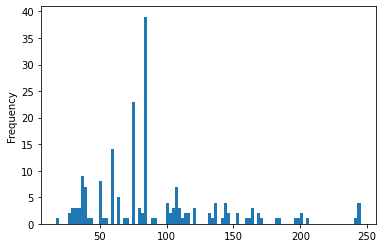

In [19]:
res_df['전용면적'].plot.hist(bins= 100)

In [ ]:
# https://ai-creator.tistory.com/24

def get_data(gu_code, base_date):
    url ="http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?"
    service_key = "<인증키를 입력하세요>"    
    payload = "LAWD_CD=" + gu_code + "&" + \
              "DEAL_YMD=" + base_date + "&" + \
              "serviceKey=" + service_key + "&"

    res = requests.get(url + payload)
    
    return res

def get_items(response):
    root = ET.fromstring(response.content)
    item_list = []
    for child in root.find('body').find('items'):
        elements = child.findall('*')
        data = {}
        for element in elements:
            tag = element.tag.strip()
            text = element.text.strip()
            # print tag, text
            data[tag] = text
        item_list.append(data)  
    return item_list